## Build a language detector model

The goal of this exercise is to train a linear classifier on text features
that represent sequences of up to 3 consecutive characters so as to be
recognize natural languages by using the frequencies of short character
sequences as 'fingerprints'.

Author: Olivier Grisel <olivier.grisel@ensta.org>

License: Simplified BSD



In [15]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [48]:
# The training data folder must be passed as first argument
languages_data_folder = sys.argv[1]
dataset = load_files('languages/paragraphs')


### Split the dataset in training and test set:

In [17]:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.5)


### Build a vectorizer that splits strings into sequence of 1 to 3 characters instead of word tokens


In [18]:

vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char',
                             use_idf=False)



In [69]:
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf

clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron()),  # a linear classifyer
])


In [70]:
print(vectorizer.get_feature_names()[1000:1100])
print(vectorizer.get_feature_names()[5000:5100])
print(vectorizer.get_feature_names()[8000:8100])

[' ув', ' уг', ' уд', ' уж', ' уз', ' ук', ' ум', ' ун', ' уп', ' ур', ' ус', ' ут', ' уч', ' ущ', ' уэ', ' ф', ' фа', ' фе', ' фи', ' фо', ' фу', ' х', ' ха', ' хо', ' хр', ' ху', ' ц', ' це', ' ци', ' ч', ' ча', ' че', ' чи', ' чт', ' чу', ' чь', ' ш', ' ши', ' шк', ' шо', ' э', ' эк', ' эм', ' эн', ' эп', ' эр', ' эт', ' эф', ' ю', ' юн', ' я', ' я ', ' яв', ' яз', ' ян', ' яп', ' أ', ' أث', ' أج', ' أح', ' أخ', ' أس', ' أط', ' أع', ' أغ', ' أف', ' أك', ' أل', ' أن', ' أو', ' أي', ' إ', ' إت', ' إد', ' إس', ' إل', ' ا', ' اخ', ' اس', ' اق', ' ال', ' ب', ' بأ', ' با', ' بت', ' بد', ' بر', ' بع', ' بل', ' بم', ' بن', ' بي', ' ت', ' تا', ' تت', ' تح', ' تد', ' تس', ' تص', ' تط']
['br)', 'bra', 'bre', 'bri', 'bro', 'bru', 'brü', 'bs', 'bs)', 'bs,', 'bsa', 'bsc', 'bse', 'bsi', 'bsk', 'bst', 'bsu', 'bsł', 'bt', 'bt ', 'bt,', 'bt.', 'bta', 'bte', 'btu', 'bu', 'bu ', 'bua', 'bub', 'buc', 'bud', 'bue', 'bug', 'bui', 'buj', 'bul', 'bum', 'bun', 'buo', 'bur', 'bus', 'but', 'buy', 'buz', 'bué',

### Fit the pipeline on the training set

In [68]:
clf.fit(docs_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ...n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False))])

### Predict the outcome on the testing set in a variable named y_predicted

In [21]:
y_predicted = clf.predict(docs_test)

### Model Evaluation: Print the classification report

http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures

https://en.wikipedia.org/wiki/Precision_and_recall#Precision


**precision**: Ability of the classifier not to label as positive a sample that is negative. The higher the number, the more sure we are that the postive labels are actually positive.

```
precision = true_positives / (true_positives + false_positives)
```

**recall**: Ability of the classifier to find all the positive samples. The higher the number, the more sure we are that we are not missing any positive labels

```
recall = true_positives / (true_positives + false_negatives)
```

**f1-score**: Combines the precision and recall. 

```
f1 = 2.0 * true_positives / (2*true_positives + false_positives + false_negatives)
```

**support**: The number of occurrences of each class in positive labels.

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [22]:

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))



             precision    recall  f1-score   support

         ar       1.00      1.00      1.00        13
         de       1.00      0.99      0.99        78
         en       1.00      1.00      1.00        72
         es       1.00      0.85      0.92        59
         fr       0.87      1.00      0.93        55
         it       1.00      0.97      0.98        31
         ja       1.00      1.00      1.00        49
         nl       1.00      1.00      1.00        23
         pl       0.91      1.00      0.95        21
         pt       0.93      0.94      0.93        53
         ru       1.00      1.00      1.00        31

avg / total       0.97      0.97      0.97       485



### Plot the confusion matrix

AKA error matrix.

In [23]:

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)



[[13  0  0  0  0  0  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  1  0  0]
 [ 0  0 72  0  0  0  0  0  0  0  0]
 [ 0  0  0 50  4  0  0  0  1  4  0]
 [ 0  0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0  1 30  0  0  0  0  0]
 [ 0  0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  3  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0  0 31]]


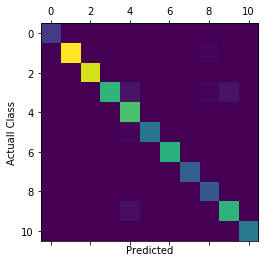

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actuall Class")

plt.show()


### Predict the result on some short new sentences:

In [14]:


sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de d\xe9tection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
    u'Nie mój cyrk, nie moje małpy.',
    u'Jest to test wykrywania języka'
]
predicted = clf.predict(sentences)

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

    
    

The language of "This is a language detection test." is "en"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"
The language of "Nie mój cyrk, nie moje małpy." is "pl"
The language of "Jest to test wykrywania języka" is "pl"
